In [2]:
from pathlib import Path
from typing import Any, Callable

import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as T

from torch.utils.data import DataLoader, Subset
from torchvision.datasets import MNIST

from src.dataset import CustomMNIST

ROOT = Path('.')


In [12]:
class CustomMNIST(MNIST):
  def __init__(
    self,
    root: str | Path,
    train: bool = True,
    transform: Callable[..., Any] | None = None,
    target_transform: Callable[..., Any] | None = None,
    download: bool = False
  ) -> None:
    super().__init__(root, train, transform, target_transform, download)
    if self.transform is not None:
      self.data = self.transform(self.data.unsqueeze(1))
    self.data_: list[torch.Tensor] = list(self.data)
    self.targets: list[int] = self.targets.tolist()

  def __getitem__(self, index: int) -> tuple[torch.Tensor, int]:
    img, target = self.data_[index], self.targets[index]

    if self.transform is not None:
      img = self.transform(img)

    if self.target_transform is not None:
      target = self.target_transform(target)

    return img, target


In [13]:
transforms = T.Compose([
  # T.ToTensor(),
  T.RandomRotation((-30, 30))
])

train_dataset = CustomMNIST(
  ROOT / 'input',
  transform=T.ToTensor(),
  download=True
)
train_dataset = Subset(train_dataset, range(1000))
val_dataset = torchvision.datasets.MNIST(
  ROOT / 'input',
  train=False,
  transform=T.ToTensor(),
  download=True
)


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [11]:
train_dataset[0]


(tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0

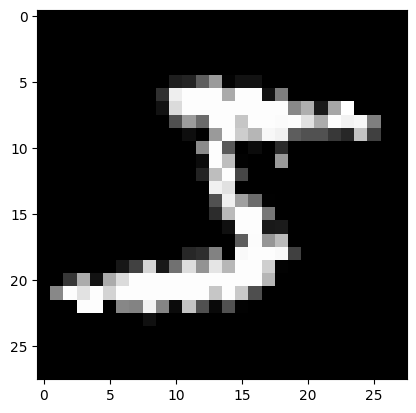

In [15]:
plt.imshow(train_dataset[0][0].squeeze(), cmap='grey')
